# Weekend Movie Trip

## Clustering

#### Submitted By: Arman Ghasemi  KU ID: 2970754  Email:arman.ghasemi@ku.edu

In this project a dataset which is describe 5-star rating and free-text tagging from MovieLens, a movie recommendation service, is chosen.It contains 27753444 ratings and 1108997 tag applications across 58098 movies. These data were created by 283228 users between January 09, 1995 and September 26, 2018. This dataset was generated on September 26, 2018.
We are going to formulate some ideas to formulate this dataset and then build a clustering model for useful recommendation.
#### Data source: https://grouplens.org/datasets/movielens/

First of all useful library should be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading datasets from the url.

In [2]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/armangh67/Weekend-movie-trip/master/datasets/movies.csv', low_memory = False)


In [3]:
movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
tags_df = pd.read_csv('https://raw.githubusercontent.com/armangh67/Weekend-movie-trip/master/datasets/tags.csv' , low_memory = False)
tags_df.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [5]:
rating_df = pd.read_csv('https://raw.githubusercontent.com/armangh67/Weekend-movie-trip/master/datasets/ratings.csv' , low_memory = False)
rating_df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Merging Datasets

Now datasets are merged on 'userId' and 'movieId'.

In [6]:
merged_df=pd.merge(rating_df,tags_df, on = ['userId','movieId'] , how ='left')
merged_df=pd.merge(merged_df , movies_df , on = ['movieId'] , how ='left')
merged_df.head(10)

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,NaN,NaN,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,NaN,NaN,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,NaN,NaN,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,NaN,NaN,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,NaN,NaN,Canadian Bacon (1995),Comedy|War


### Number of user rating per movie

In [21]:
userRatings=merged_df[['movieId','userId']].groupby( 'movieId',as_index=False).count().rename(columns={'userId':'numberOfUserRatings'})
userRatings.head(10)

,movieId,numberOfUserRatings
0,1,215
1,2,112
2,3,53
3,4,7
4,5,50
5,6,102
6,7,54
7,8,8
8,9,16
9,10,132


### Calculating number of tags

Then 15 popular tags has been plotted.

Text(0, 0.5, 'Number of tag counts')

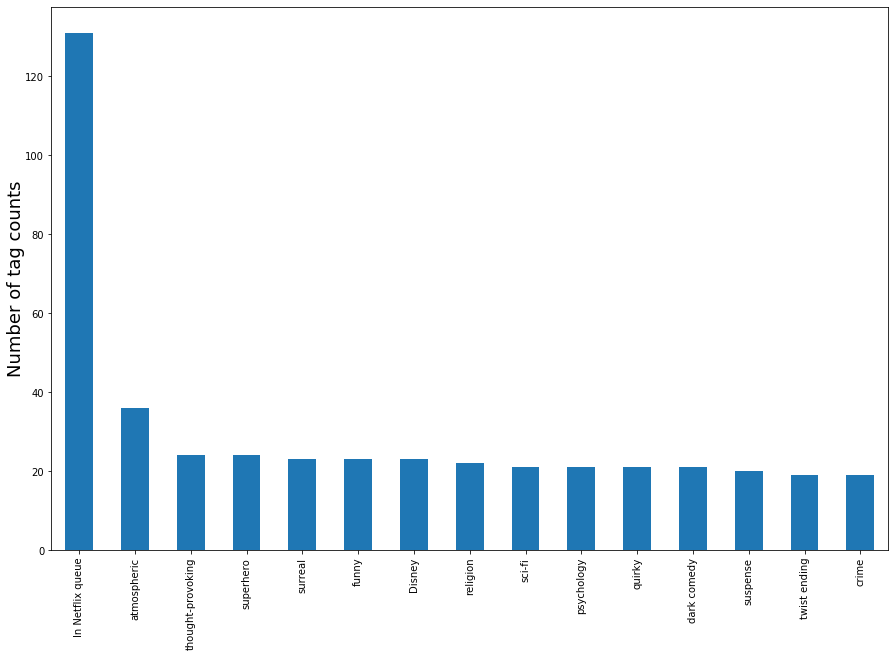

In [23]:
tag_counts = tags_df['tag'].value_counts()
tag_counts[:15].plot(kind='bar', figsize=(15,10))
plt.ylabel("Number of tag counts", fontsize = 18, labelpad = 0)

### Calculating Average Ratings

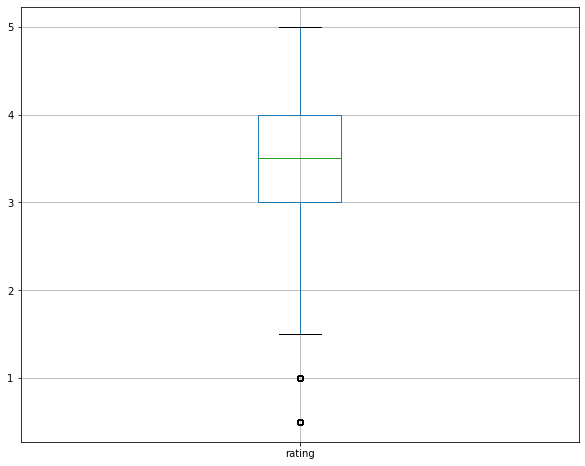

In [25]:
merged=merged_df.loc[:,['userId','movieId' , 'title', 'rating' , 'genres']]
merged.boxplot(column='rating', figsize=(10,8), return_type='axes')

This boxplot shows that the 50% of rating is between 3 and 4, alsothe average of rating is 3.5.

### Calculating the genres occurance

First we define a function to calculate the occurance of genres.

In [27]:
def count_genres(Data, column, liste):
    genres_count = {}
    for s in liste: 
        genres_count[s] = 0
    for words in Data[column].str.split('|'):
        if type(words) == float and pd.isnull(words):
            continue
        for s in words: 
            if pd.notnull(s):
                genres_count[s] += 1
    genres_occurences = []
    for k,v in genres_count.items():
        genres_occurences.append([k,v])
    genres_occurences.sort(key = lambda x:x[1], reverse = True)
    return genres_occurences, genres_count
genre_labels = set()
for s in merged_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

Then there is a way to counting how many times each of genres occur:

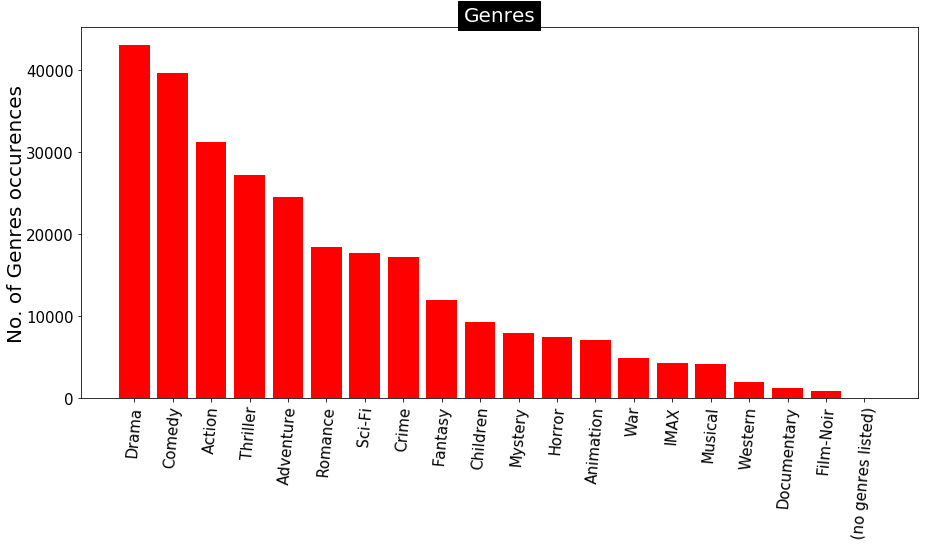

In [28]:
genres_occurences, dum = count_genres(merged_df, 'genres', genre_labels)
# Plot Genres vs Occurrences
fig = plt.figure(1, figsize=(15,15))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in genres_occurences]
x_axis = [k for k,i in enumerate(genres_occurences)]
x_label = [i[0] for i in genres_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of Genres occurences", fontsize = 20, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center',color='r')

plt.title("Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 20)
plt.show()

### Calculating average ratings for each movie

In [33]:
avgratings_df=merged_df.loc[:,['movieId' , 'title', 'genres', 'userId','rating' ]]
avgratings_df = avgratings_df.groupby('movieId')['rating'].mean().reset_index(name ='Average Rating')
final_df = merged_df.loc[:,['movieId' , 'title', 'genres']]
final_df = final_df.drop_duplicates('movieId')
final_df = pd.merge(avgratings_df,final_df, on = ['movieId'])
final_df = final_df.loc[:,['movieId','Average Rating','genres']]
final_df.head(10)

,movieId,Average Rating,genres
0,1,3.920930,Adventure|Animation|Children|Comedy|Fantasy
1,2,3.441964,Adventure|Children|Fantasy
2,3,3.245283,Comedy|Romance
3,4,2.357143,Comedy|Drama|Romance
4,5,3.040000,Comedy
5,6,3.946078,Action|Crime|Thriller
6,7,3.185185,Comedy|Romance
7,8,2.875000,Adventure|Children
8,9,3.125000,Action
9,10,3.496212,Action|Adventure|Thriller


As it can be seen from the table above the average of rating for each movie has been calculated.

### Applying kmeans

We want to find the number of suitable clusters.

In [37]:
from sklearn.preprocessing import LabelEncoder
object1 = LabelEncoder()

final_df['genres'] = object1.fit_transform(final_df['genres'].astype('str'))

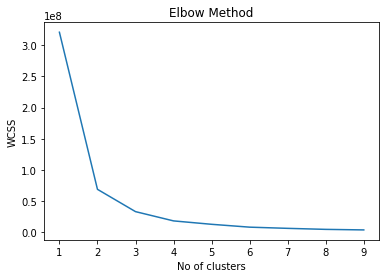

In [38]:
X=final_df.sample(5000)
X = X.iloc[:,[1,2]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

The 4 is a good value for number of clusters.

The centroid of the cluster is denoted in Black color for each cluster. Also the number of clusters are chosen based on the method apply above.

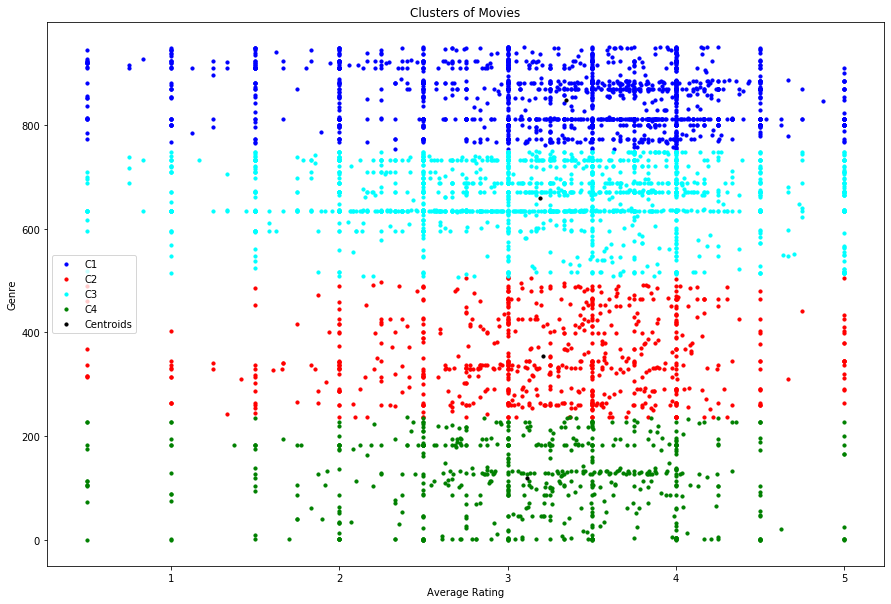

In [41]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(15,10))
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='blue', label = 'C1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='red', label = 'C2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 10, c='cyan', label = 'C3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 10, c='green', label = 'C4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
   
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend()
plt.show()

### Conclusion

It is obviously can be seen that the movies can be culstred based on their genres and also their rating values.